<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project: Linear Regression Solutions

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* REQUIRED: Fix a test-train split of the data.
* REQUIRED: Train each of your models on the training data.
* REQUIRED: Evaluate each of the models on the test data.
* REQUIRED: Rank the models by how well they score on the testing data set.

* BONUS: try k-folds.**
* BONUS:Try a few different splits of data for the same models.
* BONUS: Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

Tip: Try a variety of response variables. Start with **MEDV** / `.target` attribute from the data set load method.

A k-fold cross-validation creates a *hold* portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data)
y = pd.DataFrame(boston.target)

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis
Load the Boston housing data. Fix any problems, if applicable.


Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [3]:
# Always perform EDA!

def eda(dataframe):
    print("missing values: {}".format(dataframe.isnull().sum()))
    print("dataframe index: {}".format(dataframe.index))
    print("dataframe types: {}".format(dataframe.dtypes))
    print("dataframe shape: {}".format(dataframe.shape))
    print("dataframe describe: {}".format(dataframe.describe()))

    for item in dataframe:
        print(item)
        print(dataframe[item].nunique())

eda(X)

missing values: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64
dataframe index: RangeIndex(start=0, stop=506, step=1)
dataframe types: 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object
dataframe shape: (506, 13)
dataframe describe:                0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000 

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [4]:
from sklearn.model_selection import train_test_split # Import train-test split from model selection

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, random_state =8 ) # Split the data in half (train_size = .05)
# We're also setting a random_state in this case. 
# This is a great [Stack Overflow](https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn) explanation of what random state does. 

In [5]:
from sklearn.linear_model import LinearRegression # We then import LinearRegression

lr = LinearRegression() # and instantiate the algorithm 

In [6]:
model = lr.fit(X_train,y_train) # We then fit the model  
predictions = lr.predict(X_test) # and make predictions based on the X_test
lr.score(X_test, y_test) # Then check the score (Check: what's the default scoring metric for linear regression) 

0.71068895272802513

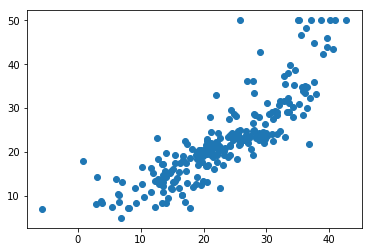

In [7]:
plt.scatter(predictions, y_test);

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 8) # All we've changed in this case is the train size

model = lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

lr.score(X_test, y_test)

0.70799341124726189

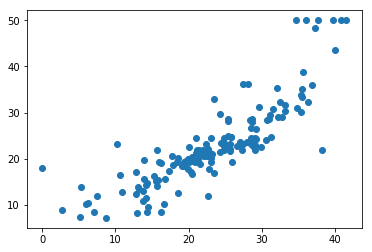

In [9]:
plt.scatter(predictions, y_test);
# There are fewer points being plotted because our test set was smaller

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9, random_state = 8)

model = lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

lr.score(X_test, y_test)
# Note that we are getting worse scores the smaller the size of our test 
# Why is that?

0.68079787628483213

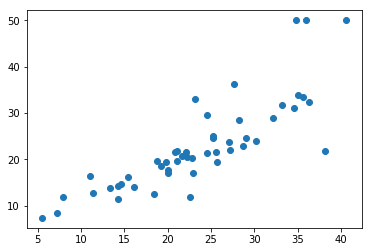

In [11]:
plt.scatter(predictions, y_test);

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

for folds in range(5,11): # Here we're just declaring how many k-folds we want our model to loop through
    lr = LinearRegression() # Scikit-learn has made it so cross_val is even more intuitive and fits the model AND cross-validates it in the same step
    scores = cross_val_score(lr, X, y, cv=folds) # For every new number of folds, we are pulling out the scores 
    
    # For every time (k) we cross-validate the model (which is also being fit in that same step)
    print("{} Cross-validated scores: {}".format(folds, scores)) # we're then asking it to print scores for every single time it does this
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds) # and its predictions
    accuracy = metrics.r2_score(y, predictions) # We're then looking at the r2 of the predicted values vs. our actual values. 
    print("{} Cross-Predicted Accuracy: {}".format(folds, accuracy)) # and printing that out
    # Extra space for printing
    print("")

5 Cross-validated scores: [ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]
5 Cross-Predicted Accuracy: 0.5596524346455092

6 Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]
6 Cross-Predicted Accuracy: 0.5376717677360494

7 Cross-validated scores: [ 0.65289125  0.59571869  0.67862548  0.61141877  0.51888956 -0.27835015
  0.39774739]
7 Cross-Predicted Accuracy: 0.5645845203864102

8 Cross-validated scores: [ 0.75014285  0.42039086  0.71854702  0.57190316  0.75650376 -0.37306354
 -0.35181135  0.33556184]
8 Cross-Predicted Accuracy: 0.6205829303927619

9 Cross-validated scores: [ 0.7414133   0.4777157   0.5777252   0.58038448  0.64917642  0.70816441
 -0.14095944 -0.5491727   0.37669769]
9 Cross-Predicted Accuracy: 0.5938404274060121

10 Cross-validated scores: [ 0.73334917  0.47229799 -1.01097697  0.64126348  0.54709821  0.73610181
  0.37761817 -0.13026905 -0.78372253  0.41861839]
10 Cross-Predicted Accuracy: 0.5901773933319214

In [46]:
# We can also do this on a subset of our data!!!
for folds in range(5,11): # Here we're just declaring how many k-folds we want our model to loop thorugh
    lr = LinearRegression() 
    scores = cross_val_score(lr, X_train, y_train, cv=folds) # In this case, we're fitting our training data and getting our initial cross_val_scores
    print str(folds)+" Cross-validated scores:", scores 
    predictions = cross_val_predict(model, X_test, y_test, cv=folds) # and getting cross_val predictions based on the test data
    accuracy = metrics.r2_score(y_test, predictions) # We're then looking at the r2 of the predicted values vs. our actual values
    print str(folds)+" Cross-Predicted Accuracy:", accuracy # and printing that out
    # Extra space for printing
    print 

5 Cross-validated scores: [ 0.7310341   0.71116734  0.79748423  0.65151326  0.59540812]
5 Cross-Predicted Accuracy: 0.406642297378

6 Cross-validated scores: [ 0.75695637  0.7336252   0.72949534  0.71607209  0.68669686  0.61731407]
6 Cross-Predicted Accuracy: 0.42247751742

7 Cross-validated scores: [ 0.73649078  0.70546698  0.75888779  0.76175865  0.72145572  0.66341562
  0.55010929]
7 Cross-Predicted Accuracy: 0.441734839927

8 Cross-validated scores: [ 0.69384559  0.72240216  0.82415326  0.6791991   0.78425579  0.58855513
  0.81466226  0.37976952]
8 Cross-Predicted Accuracy: 0.44279141739

9 Cross-validated scores: [ 0.75207266  0.69742075  0.7623421   0.7072293   0.78026808  0.66992467
  0.65066413  0.79927666  0.36591094]
9 Cross-Predicted Accuracy: 0.465948636484

10 Cross-validated scores: [ 0.75790965  0.69501916  0.70239548  0.73203965  0.76150378  0.83577713
  0.6444816   0.65302231  0.72555546  0.38274054]
10 Cross-Predicted Accuracy: 0.480357662838



### Interpretation

## Enrichment
_Everything beyond this point is BONUS. If there's time, this will be reviewed in-class as a group._

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [31]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf


# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.59e-321
Time:                        23:57:38   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.0

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

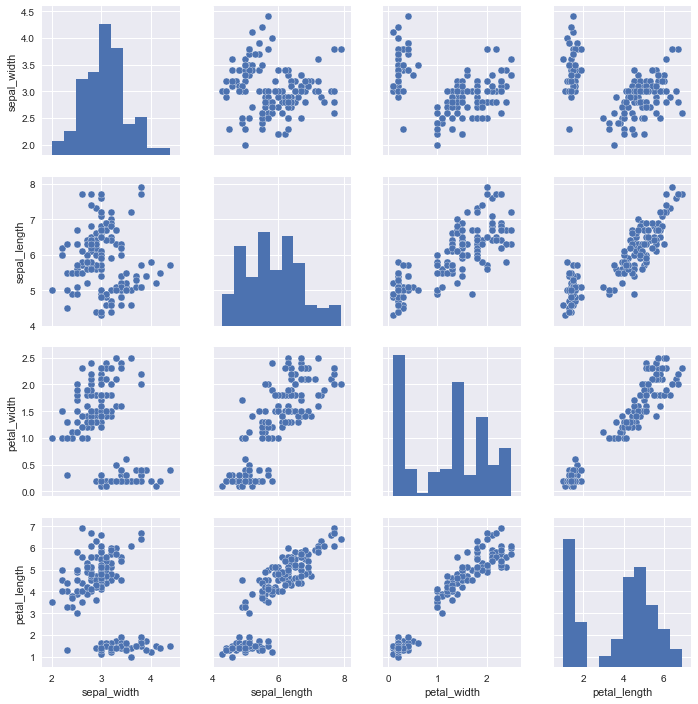

In [34]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [61]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [35]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [48]:
# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [49]:
# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.09949893991058345
